In [17]:
import Utils as utils
import TFIDF_Classification_Utils as cls_utils

import pandas as pd
import numpy as np
from sklearn.externals import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

import matplotlib
matplotlib.use('MacOSX')
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
###### TO LOAD PIPELINE ########
# pipeline = joblib.load('/home/Virality_Predictor/models/Classification_PT_pipeline.pkl') 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirayyuce/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load articles
shared_articles_df = utils.load_shared_articles('shared_articles.csv', ['pt'])

# Load users with raw virality values
user_interactions_df_raw = utils.load_user_interactions('users_interactions.csv', shared_articles_df, to_normalize=False)

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/Utils.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domain_name'] = df['url'].apply(split_url)


In [16]:
# Calculate virality classses
shared_articles_df = cls_utils.calculate_virality(shared_articles_df, user_interactions_df_raw)


In [5]:
# Data is highly unbalanced

shared_articles_df.groupby(["virality"]).size()

virality
1    785
2     25
3     12
4      1
dtype: int64

In [6]:
# Upsample under-represented classes

shared_articles_df_upsampled = cls_utils.upsample_minority_classes(shared_articles_df)
shared_articles_df_upsampled.groupby(["virality"]).size()

virality
1    785
2    760
3    773
4    784
dtype: int64

In [7]:
# Create train and test sets
articles_train, labels_train, articles_test, labels_test = cls_utils.get_train_test_datasets(shared_articles_df_upsampled)

Dataset shapes: Train data 2481 , Test data 621 , Train labels  2481 , Test labels 621


In [8]:
# Load cleaned text from /datasets. load must be False to re-do the cleaning, to load the already dumped csv file 
# set load to True
train_df = cls_utils.clean_all_text(load=False, df=articles_train, name='articles_train_PT_upsampled', lang='pt')
test_df = cls_utils.clean_all_text(load=False, df=articles_test, name='articles_test_PT_upsampled', lang='pt')

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles[row_idx] = (' ').join(cleaned_text)
/Users/mirayyuce/Desktop/Projects/Virality_Predictor/TFIDF_Classification_Utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [9]:
# Check train labels distribution
x = labels_train.to_frame(name='virality')
x.groupby(['virality']).size()

virality
1    619
2    605
3    614
4    643
dtype: int64

In [10]:
# Check test labels distribution
x = labels_test.to_frame(name='virality')
x.groupby(['virality']).size()

virality
1    166
2    155
3    159
4    141
dtype: int64

In [11]:
# Parameters set for grid search

parameters = {
'model__n_neighbors': (5, 10, 40),
'model__weights': ('uniform', 'distance'), 
}

In [12]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 50,
                        ngram_range = (1, 1),
                        min_df = 3,
                        max_df = 200)),
     ('model', KNeighborsClassifier())
   ])

In [13]:
# Run grid search for the given model

cls_utils.hyperparameter_search(parameters, pipeline, train_df, labels_train)

model__n_neighbors: 10
model__weights: 'distance'
{'mean_fit_time': array([3.12247531, 3.23631358, 3.21326772, 2.91615295, 3.26027115,
       2.54636168]), 'std_fit_time': array([0.08413982, 0.12904454, 0.1799512 , 0.03937144, 0.10545363,
       0.48649051]), 'mean_score_time': array([1.74435631, 1.73212147, 1.79456838, 1.47918264, 1.80066427,
       1.27883267]), 'std_score_time': array([0.06903139, 0.08039552, 0.15227824, 0.05288721, 0.04331444,
       0.2479944 ]), 'param_model__n_neighbors': masked_array(data=[5, 5, 10, 10, 40, 40],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_model__weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__n_neighbors': 5, 'model__weights': 'uniform'}, {'model__n_neighbors': 5, 'model__

In [14]:
# New pipeline with optimum parameters from grid search

In [18]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 50,
                        ngram_range = (1, 1),
                        min_df = 3,
                        max_df = 200)),
     ('model', KNeighborsClassifier(n_neighbors= 10, weights= 'distance'))
   ])

In [19]:
pipeline.fit(train_df, labels_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=200, max_features=50, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance'))])

In [20]:
labels_pred = pipeline.predict(test_df)

In [21]:
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75       166
           2       0.90      0.94      0.91       155
           3       0.92      0.77      0.84       159
           4       0.62      1.00      0.77       141

   micro avg       0.82      0.82      0.82       621
   macro avg       0.86      0.83      0.82       621
weighted avg       0.87      0.82      0.82       621



In [22]:
f1_score(labels_test, labels_pred, average='weighted')

0.8180010273801172

In [23]:
pipeline.named_steps['tfidf'].get_feature_names()

['afirma',
 'api',
 'apis',
 'aprendizado',
 'arduino',
 'arquitetura',
 'arquivo',
 'arquivos',
 'automatizado',
 'capybara',
 'competências',
 'crase',
 'cucumber',
 'definido',
 'elemento',
 'encontro',
 'erros',
 'ex',
 'expressão',
 'geração',
 'humanos',
 'id',
 'liderança',
 'líder',
 'líderes',
 'medida',
 'microserviços',
 'mulheres',
 'mãe',
 'pagamento',
 'palavra',
 'passo',
 'path',
 'perceber',
 'português',
 'preposição',
 'princípio',
 'produtividade',
 'robô',
 'robôs',
 'slack',
 'sprint',
 'substantivo',
 'swagger',
 'ti',
 'trello',
 'type',
 'ui',
 'ux',
 'verbo']

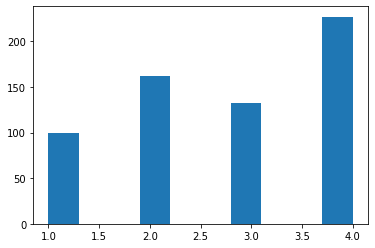

In [24]:
plt.hist(labels_pred)
plt.show()

In [25]:
joblib.dump(pipeline, '/home/Virality_Predictor/models/Classification_PT_pipeline.pkl')

['Classification_PT_pipeline.pkl']